<a href="https://colab.research.google.com/github/ahmetalperenvar/RNN-LSTM_MasterAssignment/blob/main/RNN%26LSTM_Master_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEURAL COMPUTATION AND CONTROL  ASSIGNMENT

AHMET ALPEREN VAR - 22434998016

Choosen Architecture : RNN & LSTM

# 1.Describe your use case.

I've choosed RNN and LSTM architecture because both architecture learn with backward memory. I want to make a prediction with RNN and LSTM on Google Stock Price.LSTM is more complex than RNN so,I expect better result from the model has LSTM architecture. I use **Google Stock Price Dataset**  on Kaggle.It contains 6 columns.The Columns are : "Date","Open","Close","High","Low","Volume".

# 2.What are your 2 different architectures why you choose them ?

I've choosen RNN and LSTM. Because Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) architectures are useful for time-based prediction applications due to their ability to capture sequential information and handle temporal dependencies in data.

## 3. What are preparation steps ?

I  normalized data between 0 and 1.

In [ ]:
# Connecting Google Drive to Access Database
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d medharawat/google-stock-price

  0% 0.00/23.4k [00:00<?, ?B/s]
100% 23.4k/23.4k [00:00<00:00, 1.84MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  google-stock-price.zip
  inflating: Google_Stock_Price_Test.csv  
  inflating: Google_Stock_Price_Train.csv  


In [ ]:
import numpy as np
import pandas as pd             # Datasets are in csv format
import matplotlib.pyplot as plt # To show accuracy, loss etc
import seaborn as sns

In [ ]:
data = pd.read_csv("Google_Stock_Price_Train.csv",sep=",")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
# Focus on Open Values to train and test model with
data = data.loc[:,["Open"]].values
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

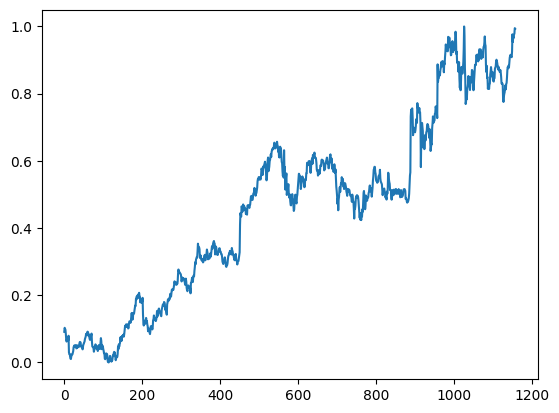

In [ ]:
train = data[:len(data)-100]  # Keeping 100 of them for test
test = data[len(train):]

train=train.reshape(train.shape[0],1)

# Normalizing between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train)

plt.plot(train_scaled)
plt.show()

In [ ]:
X_train = []
y_train = []
timesteps = 100

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# RNN

Initial Model Features : I am going to start with 4 Hidden Layers and 16 Neuron For Each Layer 32 for Batch Size and 64 for Epoch. Tanh activation function is suggested for RNN and Adam for Optimization.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 16,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 16,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 16,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 16))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 64, batch_size = 32)

Epoch 1/64
34/34 [==============================] - 6s 70ms/step - loss: 0.4525
Epoch 2/64
34/34 [==============================] - 2s 70ms/step - loss: 0.3013
Epoch 3/64
34/34 [==============================] - 4s 109ms/step - loss: 0.2423
Epoch 4/64
34/34 [==============================] - 3s 89ms/step - loss: 0.1918
Epoch 5/64
34/34 [==============================] - 2s 71ms/step - loss: 0.1829
Epoch 6/64
34/34 [==============================] - 2s 71ms/step - loss: 0.1421
Epoch 7/64
34/34 [==============================] - 3s 78ms/step - loss: 0.1323
Epoch 8/64
34/34 [==============================] - 4s 104ms/step - loss: 0.1178
Epoch 9/64
34/34 [==============================] - 3s 95ms/step - loss: 0.1062
Epoch 10/64
34/34 [==============================] - 2s 71ms/step - loss: 0.0836
Epoch 11/64
34/34 [==============================] - 2s 70ms/step - loss: 0.0778
Epoch 12/64
34/34 [==============================] - 2s 69ms/step - loss: 0.0655
Epoch 13/64
34/34 [================

In [ ]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [ ]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

4/4 [==============================] - 1s 32ms/step


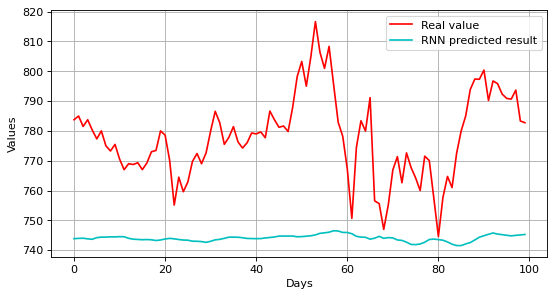

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Second RNN architecture 4 Hidden Layers and 32 Neuron For Each Layer 32 for Batch Size and 64 for Epoch

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 32,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 32,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 32,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 32))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 64, batch_size = 32)

Epoch 1/64
34/34 [==============================] - 23s 79ms/step - loss: 0.3008
Epoch 2/64
34/34 [==============================] - 3s 77ms/step - loss: 0.1869
Epoch 3/64
34/34 [==============================] - 3s 75ms/step - loss: 0.1485
Epoch 4/64
34/34 [==============================] - 4s 131ms/step - loss: 0.1034
Epoch 5/64
34/34 [==============================] - 3s 97ms/step - loss: 0.0850
Epoch 6/64
34/34 [==============================] - 3s 78ms/step - loss: 0.0779
Epoch 7/64
34/34 [==============================] - 3s 76ms/step - loss: 0.0649
Epoch 8/64
34/34 [==============================] - 3s 80ms/step - loss: 0.0546
Epoch 9/64
34/34 [==============================] - 4s 131ms/step - loss: 0.0459
Epoch 10/64
34/34 [==============================] - 3s 76ms/step - loss: 0.0435
Epoch 11/64
34/34 [==============================] - 3s 75ms/step - loss: 0.0372
Epoch 12/64
34/34 [==============================] - 3s 76ms/step - loss: 0.0351
Epoch 13/64
34/34 [===============

In [ ]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

4/4 [==============================] - 2s 28ms/step


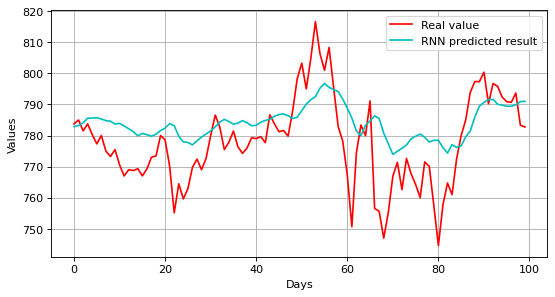

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

I obtained that increasing Neuron Count of Hidden Layer changed results in a good way. The third architecture is going to be 4 Hidden Layers and 64 Neuron For Each Layer 32 for Batch Size and 64 for Epoch

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 64,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 64,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 64,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 64))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 64, batch_size = 32)

Epoch 1/64
34/34 [==============================] - 9s 139ms/step - loss: 0.3689
Epoch 2/64
34/34 [==============================] - 4s 104ms/step - loss: 0.2979
Epoch 3/64
34/34 [==============================] - 3s 94ms/step - loss: 0.2535
Epoch 4/64
34/34 [==============================] - 3s 95ms/step - loss: 0.2120
Epoch 5/64
34/34 [==============================] - 5s 150ms/step - loss: 0.1819
Epoch 6/64
34/34 [==============================] - 3s 95ms/step - loss: 0.1882
Epoch 7/64
34/34 [==============================] - 3s 96ms/step - loss: 0.1495
Epoch 8/64
34/34 [==============================] - 3s 96ms/step - loss: 0.1094
Epoch 9/64
34/34 [==============================] - 5s 156ms/step - loss: 0.1081
Epoch 10/64
34/34 [==============================] - 3s 94ms/step - loss: 0.0887
Epoch 11/64
34/34 [==============================] - 3s 96ms/step - loss: 0.0771
Epoch 12/64
34/34 [==============================] - 4s 104ms/step - loss: 0.0622
Epoch 13/64
34/34 [=============

In [ ]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

4/4 [==============================] - 1s 49ms/step


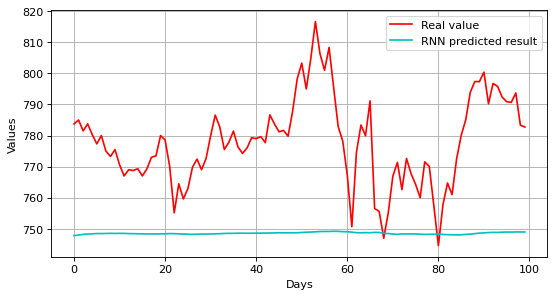

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

The third result was the worst result.I am going to try increasing epoch from the second try.4 Hidden Layers and 32 Neuron For Each Layer 32 for Batch Size and 128 for Epoch  

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 32,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 32,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 32,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 32))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 128, batch_size = 32)

Epoch 1/128
34/34 [==============================] - 8s 77ms/step - loss: 0.5550
Epoch 2/128
34/34 [==============================] - 3s 77ms/step - loss: 0.3837
Epoch 3/128
34/34 [==============================] - 3s 78ms/step - loss: 0.3039
Epoch 4/128
34/34 [==============================] - 3s 89ms/step - loss: 0.2415
Epoch 5/128
34/34 [==============================] - 4s 126ms/step - loss: 0.1899
Epoch 6/128
34/34 [==============================] - 3s 77ms/step - loss: 0.1602
Epoch 7/128
34/34 [==============================] - 3s 79ms/step - loss: 0.1333
Epoch 8/128
34/34 [==============================] - 3s 77ms/step - loss: 0.1066
Epoch 9/128
34/34 [==============================] - 4s 113ms/step - loss: 0.0956
Epoch 10/128
34/34 [==============================] - 3s 102ms/step - loss: 0.0845
Epoch 11/128
34/34 [==============================] - 3s 77ms/step - loss: 0.0733
Epoch 12/128
34/34 [==============================] - 3s 76ms/step - loss: 0.0619
Epoch 13/128
34/34 [==

In [ ]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

4/4 [==============================] - 1s 35ms/step


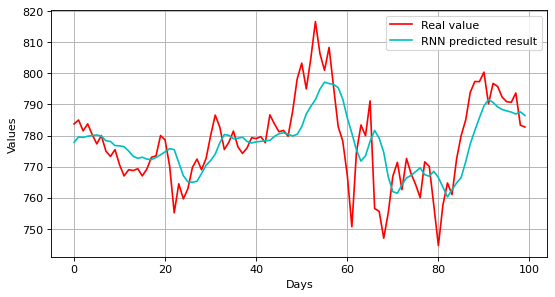

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="red",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# RNN RESULTS IN ONE PICTURE ACCORDING TO EPOCH AND NEURON COUNT

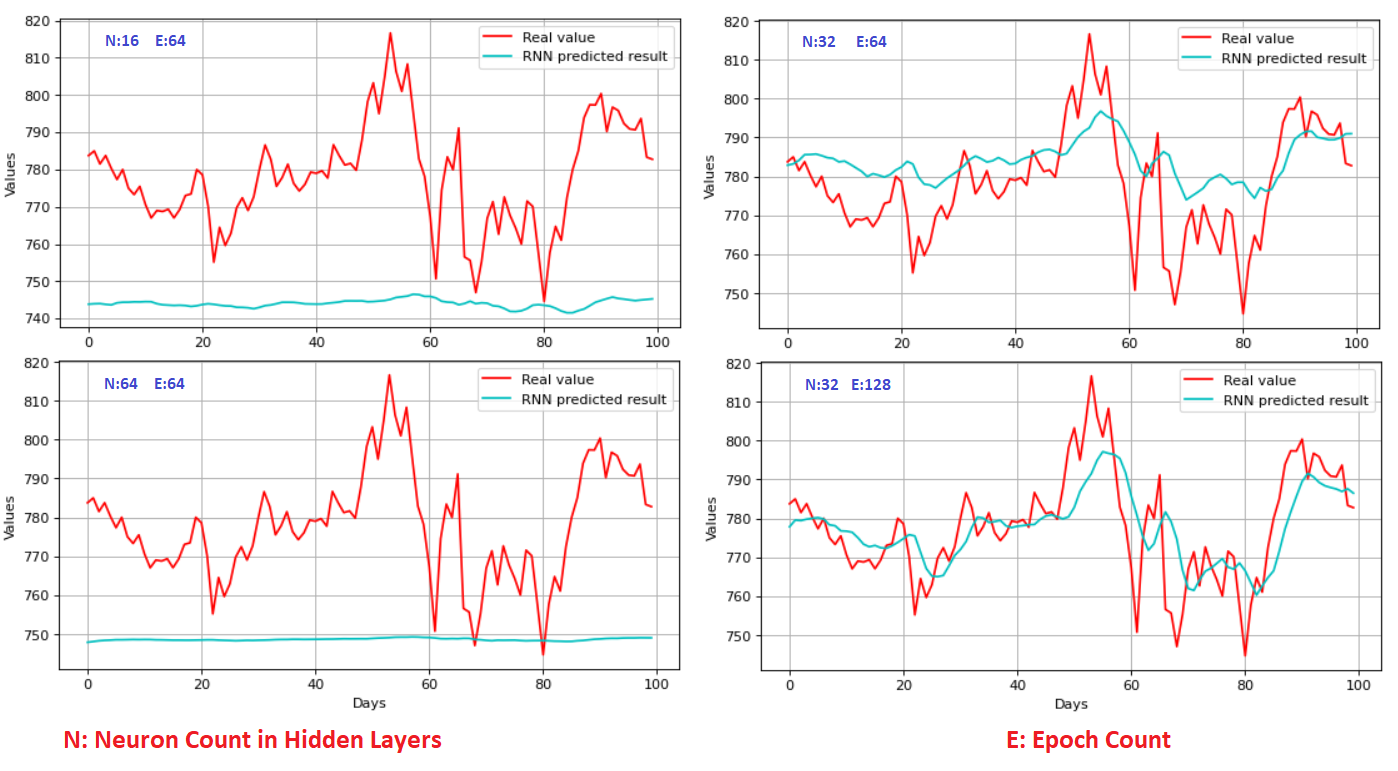

# LSTM


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(LSTM(8, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=32, batch_size=1)

Epoch 1/32
1058/1058 [==============================] - 24s 20ms/step - loss: 0.0177
Epoch 2/32
1058/1058 [==============================] - 18s 17ms/step - loss: 0.0012
Epoch 3/32
1058/1058 [==============================] - 21s 20ms/step - loss: 9.9010e-04
Epoch 4/32
1058/1058 [==============================] - 21s 19ms/step - loss: 8.5368e-04
Epoch 5/32
1058/1058 [==============================] - 19s 18ms/step - loss: 8.2662e-04
Epoch 6/32
1058/1058 [==============================] - 21s 20ms/step - loss: 6.9849e-04
Epoch 7/32
1058/1058 [==============================] - 19s 18ms/step - loss: 5.9007e-04
Epoch 8/32
1058/1058 [==============================] - 19s 18ms/step - loss: 5.5921e-04
Epoch 9/32
1058/1058 [==============================] - 21s 20ms/step - loss: 5.0776e-04
Epoch 10/32
1058/1058 [==============================] - 19s 18ms/step - loss: 4.3009e-04
Epoch 11/32
1058/1058 [==============================] - 19s 18ms/step - loss: 4.2809e-04
Epoch 12/32
1058/1058 [====

In [ ]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

4/4 [==============================] - 1s 20ms/step


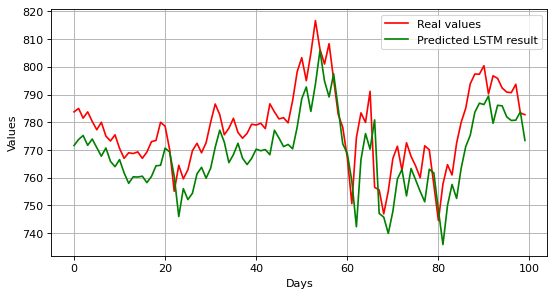

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="Red",label="Real values")
plt.plot(predicted_data2,color="Green",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(16, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=32, batch_size=1)

Epoch 1/32
1058/1058 [==============================] - 28s 24ms/step - loss: 0.0062
Epoch 2/32
1058/1058 [==============================] - 23s 22ms/step - loss: 0.0013
Epoch 3/32
1058/1058 [==============================] - 29s 28ms/step - loss: 9.8346e-04
Epoch 4/32
1058/1058 [==============================] - 26s 24ms/step - loss: 8.6531e-04
Epoch 5/32
1058/1058 [==============================] - 24s 23ms/step - loss: 7.2553e-04
Epoch 6/32
1058/1058 [==============================] - 22s 21ms/step - loss: 6.4120e-04
Epoch 7/32
1058/1058 [==============================] - 24s 22ms/step - loss: 5.4575e-04
Epoch 8/32
1058/1058 [==============================] - 21s 20ms/step - loss: 4.7600e-04
Epoch 9/32
1058/1058 [==============================] - 23s 22ms/step - loss: 4.5297e-04
Epoch 10/32
1058/1058 [==============================] - 21s 20ms/step - loss: 4.2189e-04
Epoch 11/32
1058/1058 [==============================] - 23s 22ms/step - loss: 4.0008e-04
Epoch 12/32
1058/1058 [====

In [ ]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

4/4 [==============================] - 1s 11ms/step


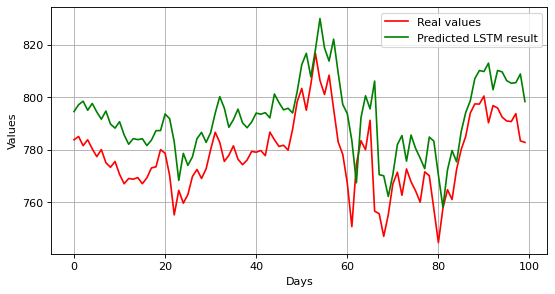

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="Red",label="Real values")
plt.plot(predicted_data2,color="Green",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

It seems like previos architecture is better than the current one. I am going to change the epoch count.

In [ ]:
model = Sequential()
model.add(LSTM(8, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=64, batch_size=1)

Epoch 1/64
1058/1058 [==============================] - 24s 20ms/step - loss: 0.0105
Epoch 2/64
1058/1058 [==============================] - 21s 20ms/step - loss: 0.0017
Epoch 3/64
1058/1058 [==============================] - 23s 22ms/step - loss: 0.0014
Epoch 4/64
1058/1058 [==============================] - 20s 19ms/step - loss: 0.0012
Epoch 5/64
1058/1058 [==============================] - 23s 22ms/step - loss: 9.5614e-04
Epoch 6/64
1058/1058 [==============================] - 21s 20ms/step - loss: 8.2520e-04
Epoch 7/64
1058/1058 [==============================] - 23s 21ms/step - loss: 7.2329e-04
Epoch 8/64
1058/1058 [==============================] - 23s 22ms/step - loss: 6.2028e-04
Epoch 9/64
1058/1058 [==============================] - 21s 20ms/step - loss: 5.2107e-04
Epoch 10/64
1058/1058 [==============================] - 22s 21ms/step - loss: 5.2234e-04
Epoch 11/64
1058/1058 [==============================] - 21s 19ms/step - loss: 4.9966e-04
Epoch 12/64
1058/1058 [============

In [ ]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

4/4 [==============================] - 0s 9ms/step


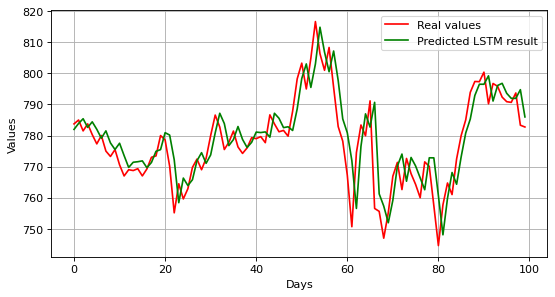

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="Red",label="Real values")
plt.plot(predicted_data2,color="Green",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

It seems like increasing epoch count worked.I gonna try again.

In [ ]:
model = Sequential()
model.add(LSTM(8, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=128, batch_size=1)

Epoch 1/128
1058/1058 [==============================] - 23s 19ms/step - loss: 0.0074
Epoch 2/128
1058/1058 [==============================] - 22s 21ms/step - loss: 0.0011
Epoch 3/128
1058/1058 [==============================] - 20s 19ms/step - loss: 9.5256e-04
Epoch 4/128
1058/1058 [==============================] - 24s 23ms/step - loss: 8.3272e-04
Epoch 5/128
1058/1058 [==============================] - 23s 21ms/step - loss: 8.1160e-04
Epoch 6/128
1058/1058 [==============================] - 31s 29ms/step - loss: 6.8470e-04
Epoch 7/128
1058/1058 [==============================] - 24s 22ms/step - loss: 6.8705e-04
Epoch 8/128
1058/1058 [==============================] - 20s 19ms/step - loss: 6.1683e-04
Epoch 9/128
1058/1058 [==============================] - 22s 21ms/step - loss: 5.9271e-04
Epoch 10/128
1058/1058 [==============================] - 22s 20ms/step - loss: 5.4693e-04
Epoch 11/128
1058/1058 [==============================] - 22s 21ms/step - loss: 5.1434e-04
Epoch 12/128
105